## Introduction to Persistent Homology using `scikit-tda` and `GUDHI`

Notebook written by Álvaro Torras Casas, Cardiff University, Michaelmass 2022

We will be using the `scikit-tda` and `gudhi` libraries through this notebook. The documentation for these can be found:

https://scikit-tda.org/

<img src=https://scikit-tda.org/_static/logo.png width="150">

https://gudhi.inria.fr/

<img src=https://gudhi.inria.fr/images/gudhi_banner.jpg width="230">

Through this notebook we use some original images from the `scikit-tda` and `gudhi` libraries.

To run the selected cell and select the next cell, press `shift`+ `enter`


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import timeit

import tadasets

### Data Examples with `tadasets.py`

<img src=https://scikit-tda.org/_images/tadasets.png width="120"> 

In this notebook, we will review some of the common filtered complexes used in TDA. 

Let us get some sample points about a swiss roll

In [2]:
infty_pts = tadasets.infty_sign(30, noise=0.05)

**Tips:** The python `help()` command is useful when we are unsure of what a function does. Also, pressing the tab key after typing `tadasets.` gives us the different functions and classes of the `tadasets.py` module. 

In [3]:
help(tadasets.infty_sign)

Help on function infty_sign in module tadasets.shapes:

infty_sign(n=100, noise=None)
    Construct a figure 8 or infinity sign with :code:`n` points and noise level with :code:`noise` standard deviation.
    
    Parameters
    
    n: int
        number of points in returned data set.
    noise: float
        standard deviation of normally distributed noise added to data.



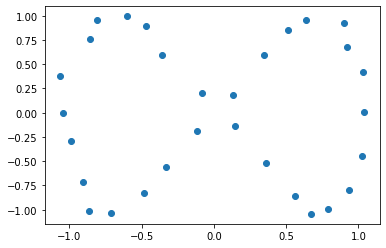

In [4]:
plt.scatter(infty_pts[:,0], infty_pts[:,1])

In [5]:
torus_pts = tadasets.torus(300)

<Axes3DSubplot:>

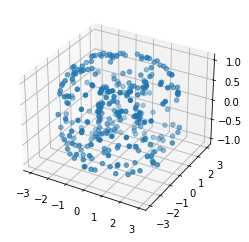

In [6]:
tadasets.view.plot3d(torus_pts)

In [7]:
help(tadasets.view.plot3d)

Help on function plot3d in module tadasets.view:

plot3d(data, fig=None, ax=None, **params)



### Compute Cech complexes


**Ignore the Cechmate module for installation problems**

`Cechmate` is an interface for the PHAT C++ module: https://github.com/blazs/phat

https://cechmate.scikit-tda.org/en/latest/notebooks/BasicUsage.html

<img src=https://scikit-tda.org/_images/cechmate.png width=120>

As this module is not working, we can comment several lines using `ctrl`+`/` (notice that `/` is pressed in the numpad)

In [8]:
# import cechmate as cm

# cech_1 = cm.Cech(maxdim=1)
# cech_1

# infty_cpx = cech_1.build(infty_pts)

# cechdgms = cech_1.diagrams(infty_cpx)

# N = 40
# M = 50
# infty_cpx[N:M] # print simplices between N < M from the Cech filtration

# plot_diagrams(cechdgms, labels = ['$H_0$ Cech', '$H_1$ Cech'])
# plt.show()

### Compute Alpha complexes using `GUDHI`

In [9]:
import gudhi as gd

In [10]:
from gudhi import AlphaComplex
ac = AlphaComplex(points=infty_pts)
stree = ac.create_simplex_tree()
alphadgms = stree.persistence()

usetex mode requires ghostscript.


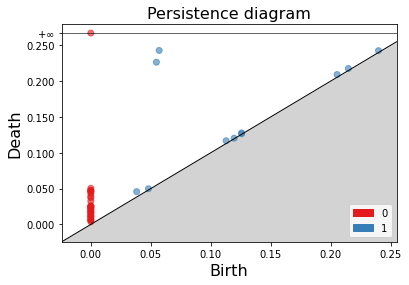

In [11]:
gd.plot_persistence_diagram(alphadgms, legend = True)
plt.show()

### Compute Vietoris-Rips complexes using `ripser.py`

Next, let us use `Ripser`to compute the persistent homology associated to Vietoris-Rips complexes

<img src=https://scikit-tda.org/_images/ripser.png width=120>

https://github.com/scikit-tda/ripser.py

In [12]:
from ripser import Rips

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


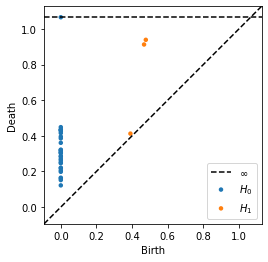

In [13]:
rips = Rips()
ripsdgms = rips.fit_transform(infty_pts)
rips.plot(ripsdgms)

### Comparing Persistence Diagrams

We can also plot both the Cech and Rips diagrams on the same plot:

Diagram plotting using `Persim`

<img src=https://persim.scikit-tda.org/en/latest/_static/logo.png width=120>

https://persim.scikit-tda.org/en/latest/

First, we transform the diagrams from the alpha complex stored in `alphadgms` into the format that we need.

In [14]:
zero_alpha_bars, one_alpha_bars = [], []
for bar in alphadgms:
    if bar[0] == 0:
        zero_alpha_bars.append(bar[1])
    elif bar[0] == 1:
        one_alpha_bars.append(bar[1])
        
alpha_diagrams = [np.array(zero_alpha_bars), np.array(one_alpha_bars)]

In [15]:
from persim import plot_diagrams
import matplotlib.pyplot as plt

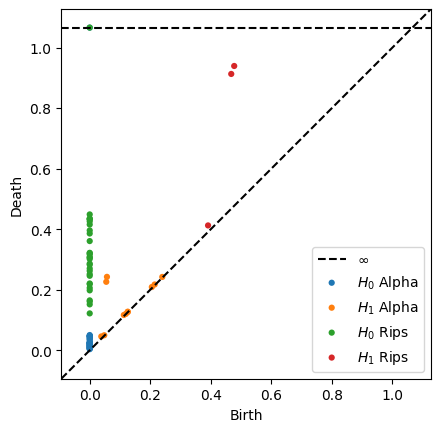

In [16]:
plot_diagrams(alpha_diagrams + ripsdgms, labels = ['$H_0$ Alpha', '$H_1$ Alpha', '$H_0$ Rips', '$H_1$ Rips'])

There are big differences! How can we measure exactly these? 
**Answer**: One option is to use the bottleneck distance